In [190]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.svm import SVC

In [191]:
iris=load_iris()

In [192]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [193]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [194]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [195]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [196]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [197]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [198]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [199]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [200]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

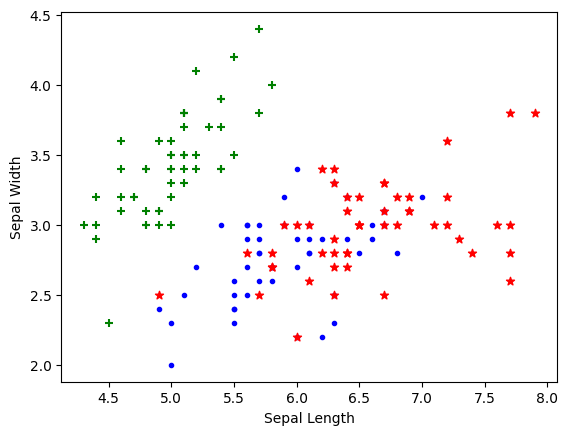

In [201]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green', marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue', marker='.')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red', marker='*')

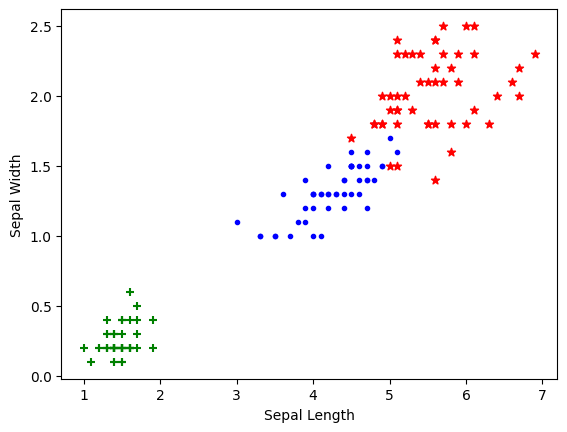

In [202]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green', marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue', marker='.')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='red', marker='*')

In [203]:
X=df.drop(['target', 'flower_name'], axis='columns')
Y=df[['target']]

In [204]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [205]:
Y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [206]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.1)

In [207]:
model=SVC()

In [208]:
model.fit(X_train, Y_train)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [209]:
model.score(X_test, Y_test)

0.9333333333333333

In [210]:
model.predict(X_test)

array([1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2])

In [211]:
Y_test

,target
96,1
32,0
44,0
76,1
16,0
119,2
61,1
10,0
26,0
137,2


In [213]:
model_C=SVC(C=1)
model_C.fit(X_train, Y_train)
model_C.score(X_test, Y_test)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9333333333333333

In [214]:
model_C=SVC(C=10)
model_C.fit(X_train, Y_train)
model_C.score(X_test, Y_test)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9333333333333333

In [215]:
model_g=SVC(gamma=10)
model_g.fit(X_train, Y_train)
model_g.score(X_test, Y_test)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8666666666666667

In [216]:
model_k=SVC(kernel='linear')
model_k.fit(X_train, Y_train)
model_k.score(X_test, Y_test)

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9333333333333333